#**Before starting...**

This notebook works if a custom module called 'my_transformer.py' and the dataset 'sample_dataset.csv' is used, which you can download from my github by [clicking here](https://github.com/SalvatoreGifuni/Pre-processing-di-un-Dataset-di-Rilevazione-del-Tumore-al-Seno.git).

Then you can upload them at the same time in the box just below 'Importing Modules'.

#**Pre-processing di un Dataset di Rilevazione del Tumore al Seno**

**Project Overview**

The project focuses on preprocessing a breast cancer detection dataset to ensure data quality and readiness for machine learning models. By creating a robust and automated preprocessing pipeline using Scikit-learn's tools, the aim is to transform raw data into a format that enhances model performance.

**Objectives and Benefits**

Automation and Scalability: Ensures consistent and replicable data handling, reducing preparation time.
Data Quality Optimization: Improves data quality through cleaning and handling of skewed variables.
Customized Techniques: Allows for advanced transformations like skewness analysis, PCA, and feature selection.
Pipeline Descriptions

*Pipeline for Target = 1*: Focuses on positive cancer detection cases, addressing missing values, symmetrization, one-hot encoding, and standardization.

*Pipeline for All Records: *Transforms all dataset records with missing value strategies, binning for numerical variables, ordinal encoding, and feature selection.

*Pipeline for Numerical Variables:* Applies missing value cleaning, PCA for dimensionality reduction, symmetrization, and normalization.

**Final Outcome**

A comprehensive preprocessing object will be created, ready for production use, offering a scalable solution for complex datasets and robust model training.

#**Importing Modules and Useful Functions**

##*Importing Modules*

In [ ]:
# Upload 'my_transformer.py' and 'sample_dataset.csv'
from google.colab import files
uploaded = files.upload()

In [ ]:
# Checking the Existence of Files
!ls

my_transformer.py  pipeline.joblib  __pycache__  sample_data  sample_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import my_transformer as myt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler, OrdinalEncoder, KBinsDiscretizer, MinMaxScaler, FunctionTransformer
from sklearn.feature_selection import SelectKBest, chi2
from joblib import dump
from typing import Union, Optional

##*Constants*

In [ ]:
LINE_SEP = '\n'+'-'*30+'\n'

#**EDA**

##*General considerations*

In [ ]:
# Importing the dataset
df = pd.read_csv("sample_dataset.csv")
print('Total Rows x Columns:', df.shape)

print(LINE_SEP)

# Show the first 20 rows of the dataset
df.head(20)

Total Rows x Columns: (569, 31)

------------------------------



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,NaN,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.08690,0.07017,NaN,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,NaN,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,NaN,NaN,NaN,0.05999,...,25.53,NaN,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,NaN,0.2597,0.09744,...,26.50,NaN,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,NaN,NaN,NaN,0.13280,0.19800,NaN,0.1809,NaN,...,16.67,152.20,1575.0,0.1374,NaN,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,NaN,0.12780,0.17000,0.15780,NaN,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,NaN,119.60,NaN,NaN,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,NaN,0.08368,0
7,13.71,20.83,90.20,NaN,NaN,0.16450,0.09366,NaN,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,NaN,0.20600,0.4378,0.10720,0
9,NaN,24.04,83.97,475.9,NaN,0.23960,0.22730,0.08543,NaN,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


On initial examination, the dataset appears to comprise predominantly numeric variables with a wide range of domains, in addition to the presence of null values.

The variable designated as 'target' appears to contain only two values, '0' and '1', which could be classified as a categorical discrete variable.

These preliminary observations will be subjected to further scrutiny through an in-depth exploratory analysis of the data.

In [ ]:
# Show generic dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              482 non-null    float64
 1   mean texture             492 non-null    float64
 2   mean perimeter           513 non-null    float64
 3   mean area                403 non-null    float64
 4   mean smoothness          384 non-null    float64
 5   mean compactness         480 non-null    float64
 6   mean concavity           439 non-null    float64
 7   mean concave points      382 non-null    float64
 8   mean symmetry            471 non-null    float64
 9   mean fractal dimension   504 non-null    float64
 10  radius error             475 non-null    float64
 11  texture error            434 non-null    float64
 12  perimeter error          381 non-null    float64
 13  area error               494 non-null    object 
 14  smoothness error         4

It can be seen that the dataset consists of several non-zero values in all variables except the target variable.

We will further check the absence of non-zero values for the variable 'target' (this is observed by the fact that the number of non-zero values is equal to the number of observations).

All the characteristics are numeric, except for the 'area error' which is of the 'object' type.

In [ ]:
# Show column descriptions 0 to 10
df.iloc[:,:11].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error
count,482.000000,492.000000,513.000000,403.000000,384.000000,480.000000,439.000000,382.000000,471.000000,504.000000,475.000000
mean,14.059548,19.311829,92.039025,661.522581,0.097156,0.104531,0.094063,0.049115,0.181405,0.062626,0.402414
std,3.501791,4.347769,24.028669,356.669534,0.014502,0.053335,0.083301,0.038449,0.027633,0.007102,0.277978
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500
25%,11.672500,16.170000,75.270000,428.100000,0.086688,0.064815,0.030410,0.020682,0.161950,0.057530,0.233650
50%,13.280000,18.860000,86.340000,556.700000,0.096565,0.093125,0.068240,0.033770,0.179100,0.061300,0.319800
75%,15.745000,21.802500,104.700000,796.000000,0.106825,0.130325,0.135100,0.074122,0.196600,0.066003,0.473500
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.097440,2.873000


In [ ]:
# Show column descriptions 11 to 20
df.iloc[:,11:21].describe()

,texture error,perimeter error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius
count,434.000000,381.000000,492.000000,456.000000,379.000000,507.000000,487.000000,412.000000,475.000000
mean,1.209692,2.815977,0.007072,0.025096,0.031244,0.011825,0.020561,0.003859,16.286853
std,0.547571,1.958316,0.003041,0.017075,0.026637,0.006093,0.008199,0.002730,4.864029
min,0.360200,0.771400,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000
25%,0.823100,1.597000,0.005124,0.013600,0.015200,0.007925,0.015190,0.002277,13.060000
50%,1.095000,2.244000,0.006382,0.020435,0.026260,0.010910,0.018780,0.003222,14.920000
75%,1.474750,3.283000,0.008215,0.031790,0.040775,0.014750,0.023425,0.004571,18.550000
max,3.896000,21.980000,0.031130,0.106400,0.303800,0.052790,0.078950,0.029840,36.040000


In [ ]:
# Show column descriptions 21 to 30, considering that the only categorical variable is not included in the ‘describe’.
df.iloc[:,21:31].describe()

,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,414.000000,460.000000,512.000000,468.000000,474.000000,507.000000,495.000000,410.000000,470.000000,569.000000
mean,25.599058,107.322848,893.873828,0.133065,0.256748,0.267936,0.116579,0.291797,0.084363,0.627417
std,6.186596,33.967766,587.297571,0.023000,0.160373,0.209779,0.066426,0.066327,0.018683,0.483918
min,12.490000,54.490000,185.200000,0.071170,0.034320,0.000000,0.000000,0.156600,0.055040,0.000000
25%,20.842500,84.147500,510.275000,0.117175,0.144500,0.106450,0.065280,0.248725,0.071857,0.000000
50%,25.225000,97.455000,686.550000,0.131450,0.211850,0.212300,0.101500,0.282050,0.079870,1.000000
75%,29.485000,126.950000,1141.000000,0.147125,0.343800,0.384100,0.165650,0.319750,0.092172,1.000000
max,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# Show the categorical variable descriptions
print(df.describe(include=['object']))

print(LINE_SEP)

# Show the count of values for the categorical variable
print("Possible values of the area error variable.\n", df['area error'].value_counts())

       area error
count         494
unique          3
top             A
freq          489

------------------------------

Possible values of the area error variable.
 area error
A    489
B      4
C      1
Name: count, dtype: int64


The categorical variable is considered separately as '.describe()' only reads numeric variables.

The variable is categorical ordinal, with a high frequency of value 'A' and a very low frequency of variables 'B' and 'C'.

Check that the target column does not contain null values.

In [ ]:
# Double check.

# Return the names of columns with non-null values.
non_null_columns = df.columns[df.notna().all()]
print('The variables with non-null values are:', non_null_columns)

print(LINE_SEP)

# Verify the equality between the non-null values of the dataset excluding the 'target' variable and the non-null values of the entire dataset.
non_null_sum_excluding_target = df.iloc[:, :-1].isna().sum().sum()
non_null_sum_total = df.isna().sum().sum()
print("Equality between the sum of non-null values of the 'dataset - target' and the sum of non-null values of the dataset:",
      non_null_sum_excluding_target == non_null_sum_total)

The variables with non-null values are: Index(['target'], dtype='object')

------------------------------

Equality between the sum of non-null values of the 'dataset - target' and the sum of non-null values of the dataset: True


It is confirmed that the variable 'target' does not contain null values.

The values of the 'target' column are checked to classify it as a categorical or numerical variable.

In [ ]:
# Verification of target variable values.
print('Values of target variable\n')
print(df['target'].value_counts())

print(LINE_SEP)

print(df['target'].unique())

Values of target variable

target
1    357
0    212
Name: count, dtype: int64

------------------------------

[0 1]


Although the variable is numerical, it can be classified as categorical because it has only two values '0' and '1', i.e. a binary variable that divides the observations into two different categories: '1' represents positive cases, i.e. observations that belong to this category; '0' indicates that the observations do not belong to category '1'.

A slight discrepancy is observed between the values of 1 and 0. While the number of values equal to 1 is greater, the discrepancy is deemed to be negligible when considered in the context of the totality of observations.

The presence of duplicate observations is checked.

In [ ]:
# Check for duplicate observations
df.duplicated().value_counts()

,count
False,569


No instances of replication were identified.

##*Examination of the symmetry of features and outliners*

In [ ]:
# The dataset is divided into two distinct categories: independent and target variables.
X = df.iloc[:,:-1]
y = df['target']

# Subsequently, the independent variables are subdivided into two further categories: numeric and categorical variables.
numerical = X.select_dtypes(exclude = ['object'])
numerical_columns = numerical.columns

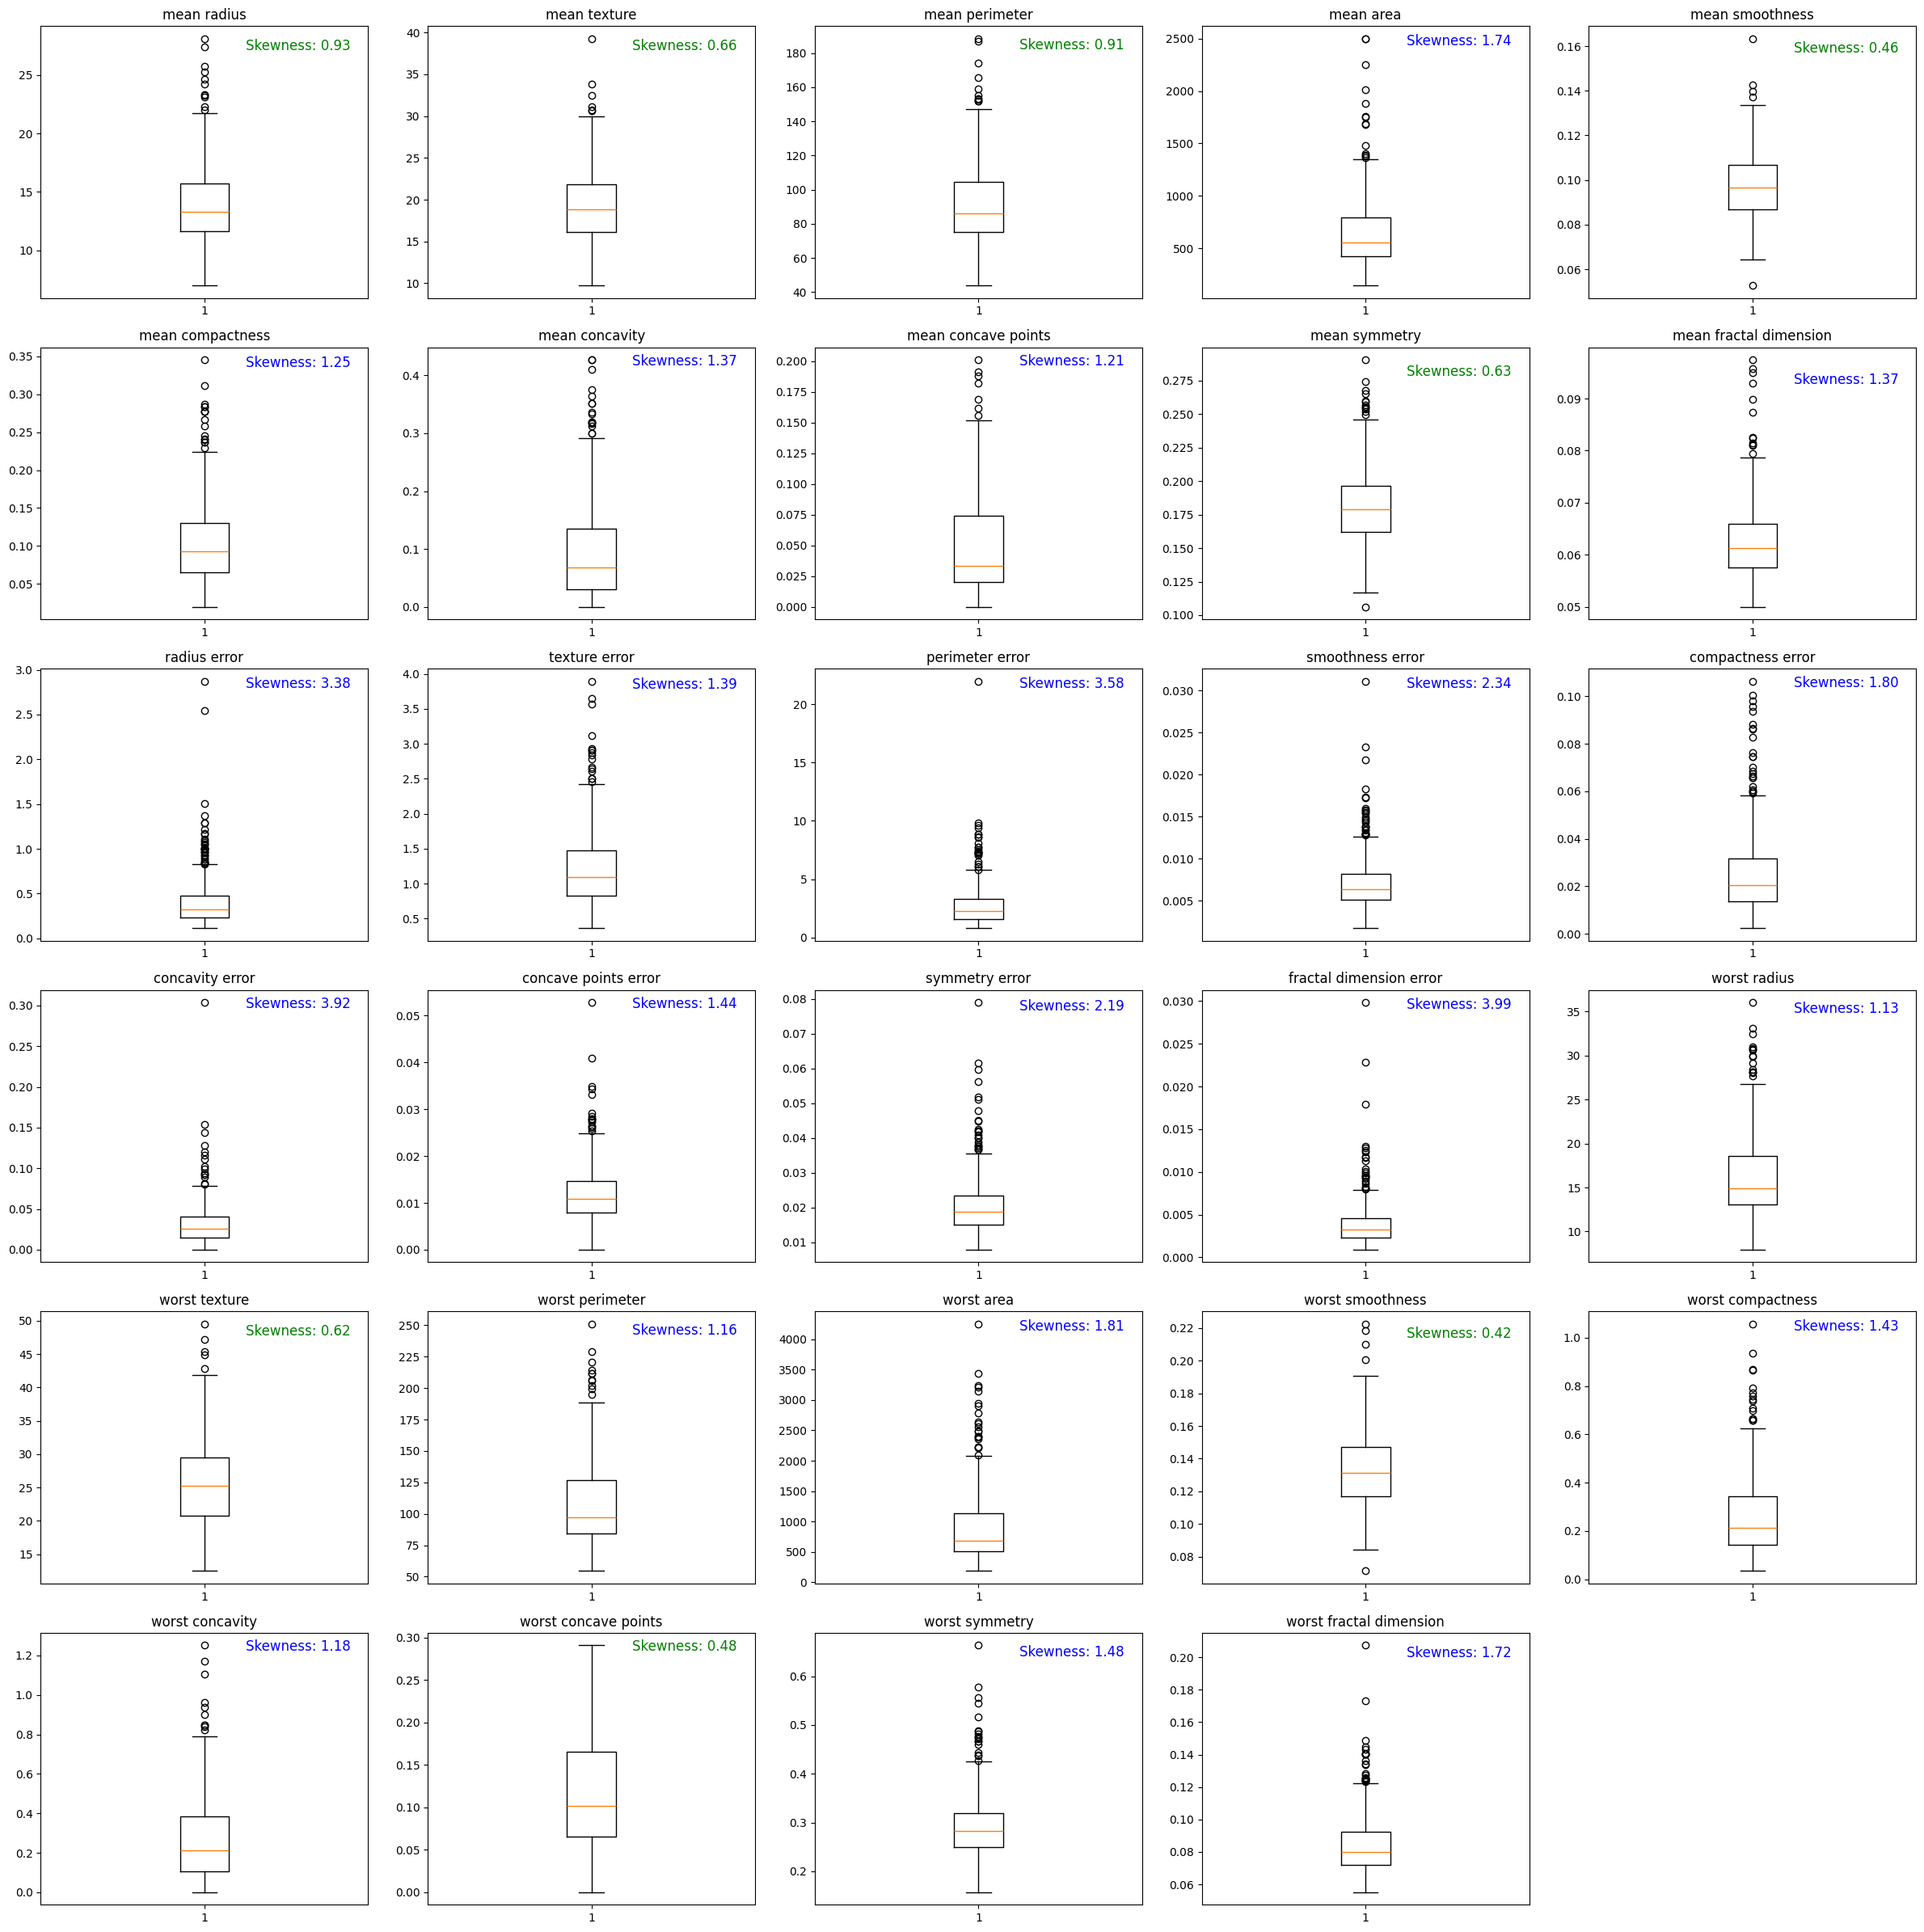

In [ ]:
# A symmetry analysis will be conducted on the numerical variables presented in the boxplot graphs and histograms.

# Boxplot graphs. Furthermore, boxplot graphs facilitate the identification of outliers.
skew_dic = myt.generate_symmetry_graphs(X, figsize=(24,24), y_max_input = 0.93, fontsize = 12,
                         x_max_input = 0.75, colors=('blue', 'green'), skew_threshold=1, return_skew_dic = True)

In [ ]:
# Calculate the average skewness
average_skewness = sum(skew_dic.values()) / len(skew_dic)

# Print the average skewness
print(f'Average Skewness: {average_skewness:.2f}')
print(f'Min Skewness: {min(skew_dic.values())}')
print(f'Max Skewness: {max(skew_dic.values())}')

Average Skewness: 1.59
Min Skewness: 0.42
Max Skewness: 3.99


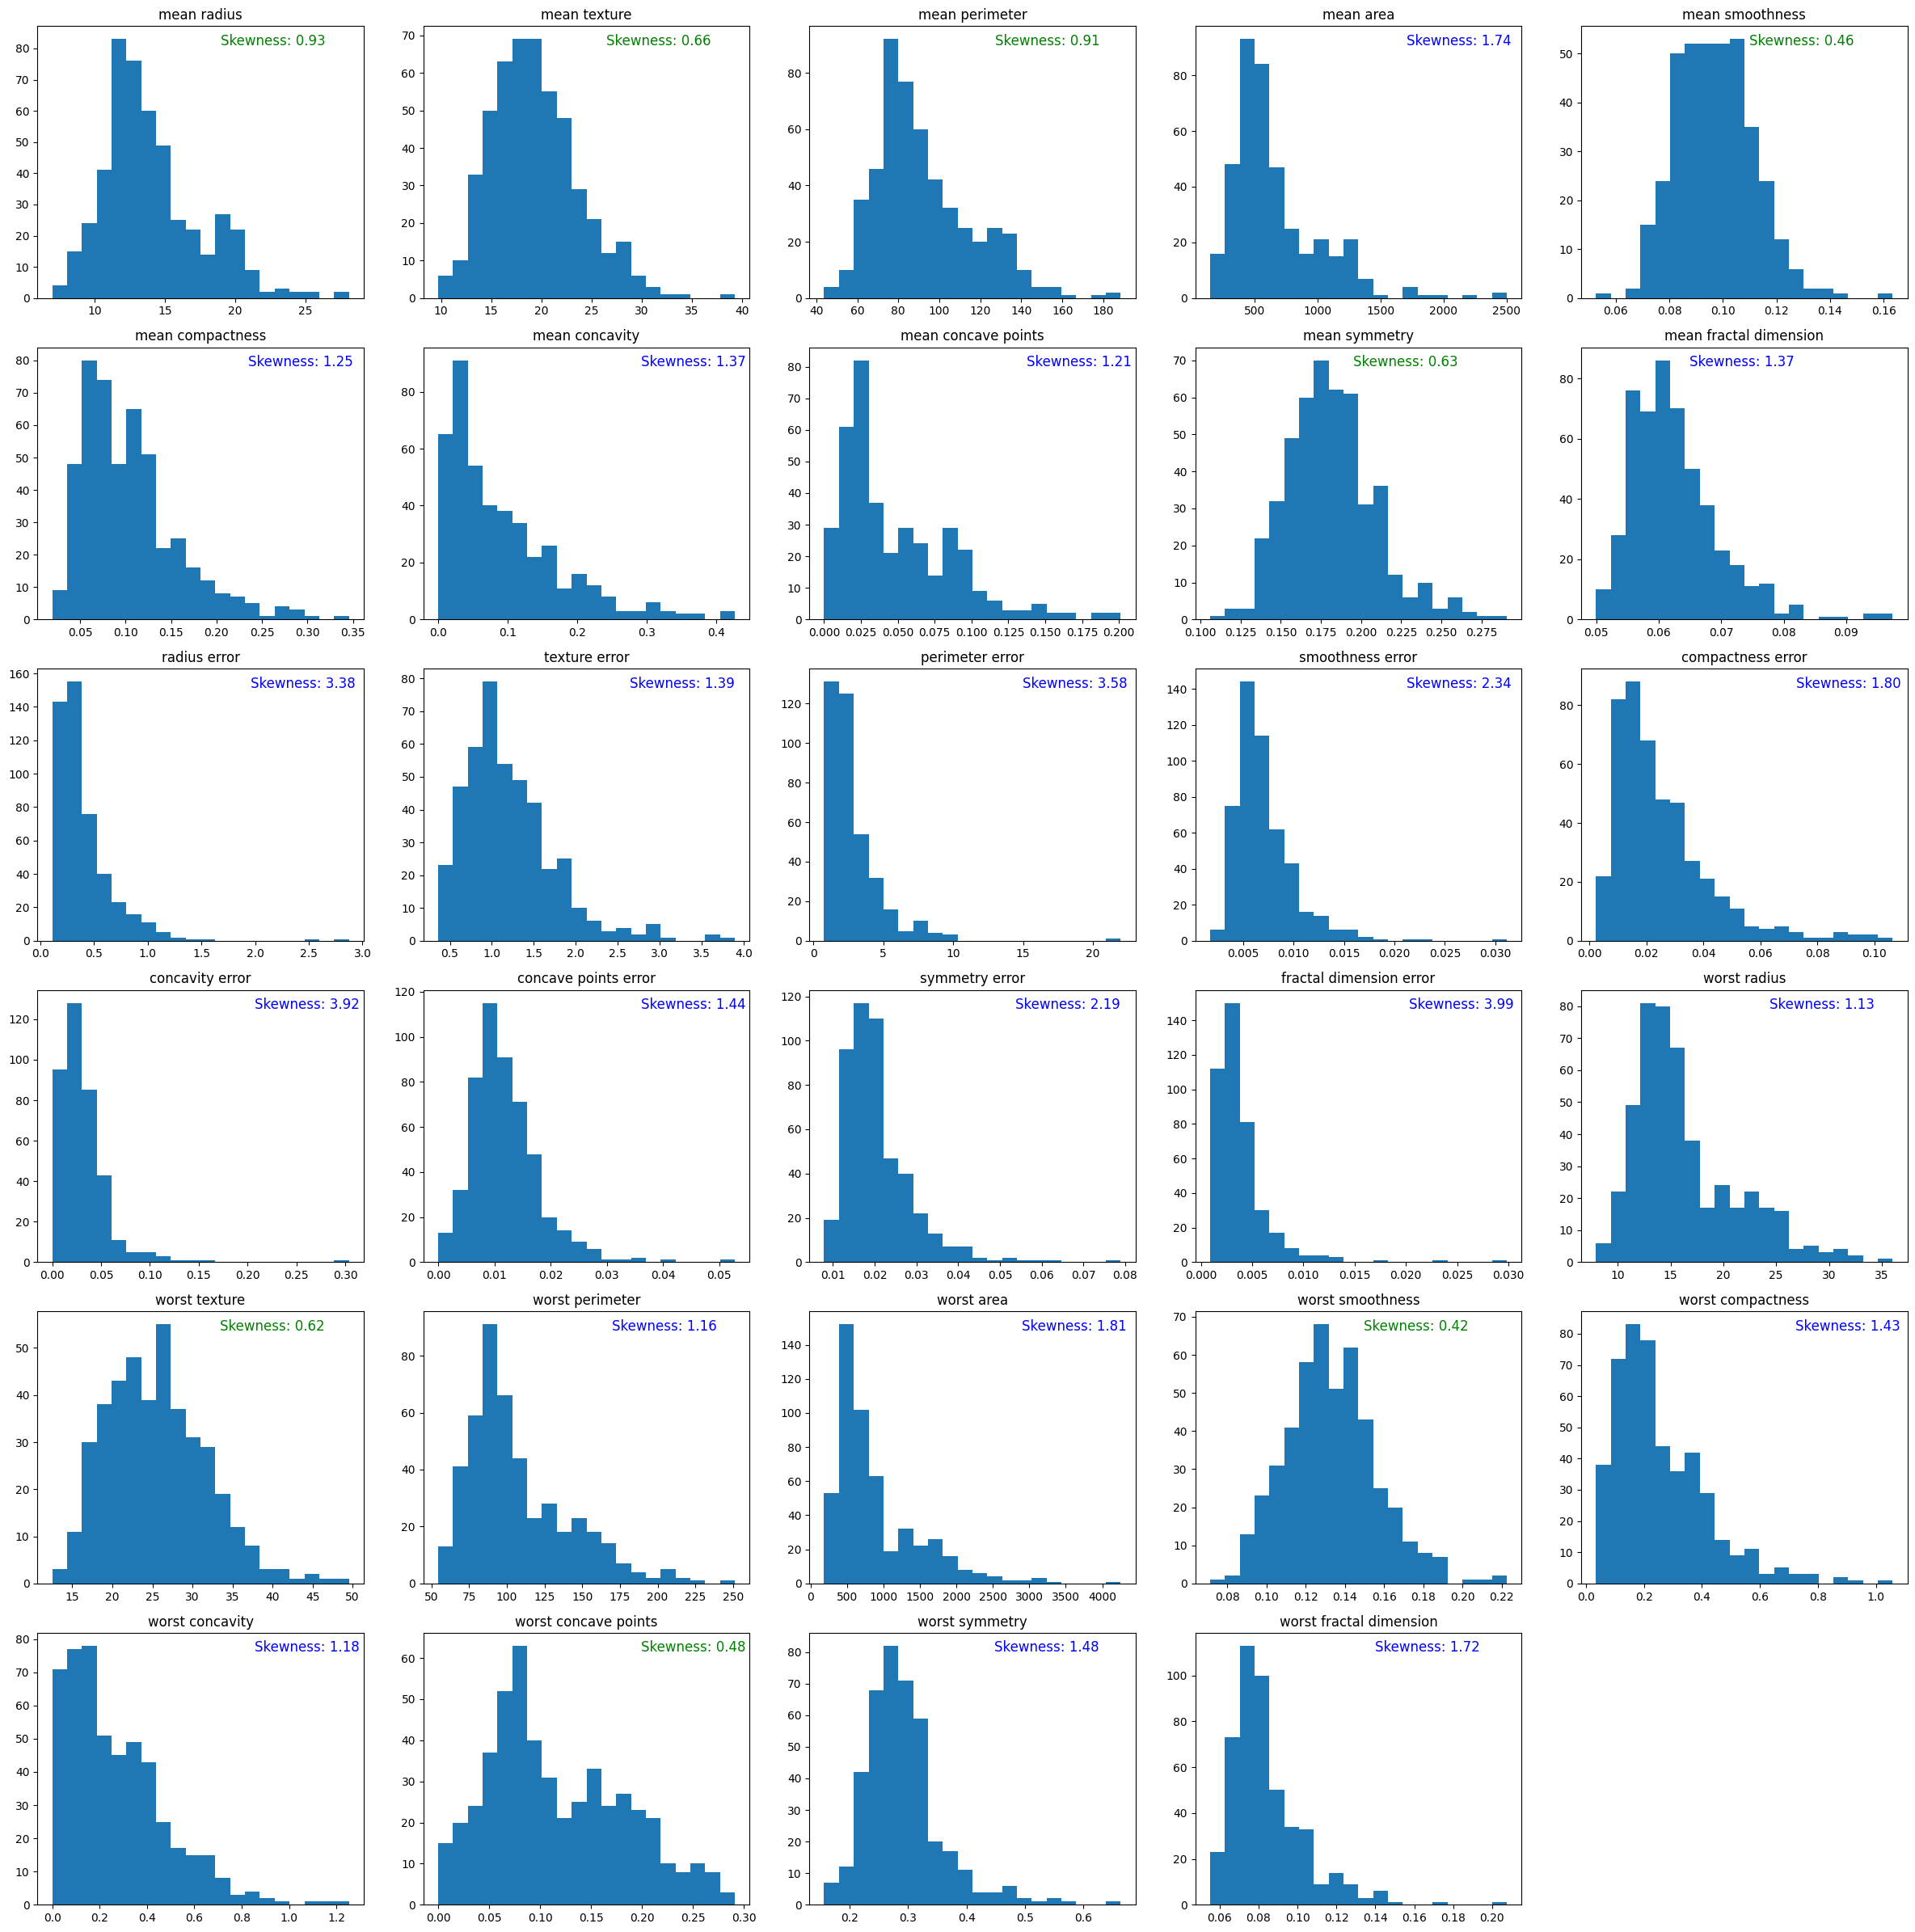

In [ ]:
myt.generate_symmetry_graphs(X, figsize=(24,24), y_max_input = 0.93, fontsize = 12, graph = 'hist',
                         x_max_input = 0.65, colors=('blue', 'green'), skew_threshold=1, return_skew_dic = False)

The graphs demonstrate that no variable exhibits perfect symmetry, with a skewness value ranging from a minimum of 0.42 to a maximum of 3.99, with an average of approximately 1.60.

It is proposed that a suitable threshold for distinguishing between symmetrical and asymmetrical variables is a skewness value of 1.

In [ ]:
asymmetric_feature = [keys for keys, value in skew_dic.items() if value > 1]
symmetric_feature = [keys for keys, value in skew_dic.items() if value < 1]

# Show the name of asymmetric variables
print('The names of asymmetric variables are:\n', asymmetric_feature)

# Show the count of asymmetric variables
print('\nThe count of asymmetric features is:', len(asymmetric_feature))

print(LINE_SEP)

# Show the name of symmetric variables
print('The names of symmetric variables are:\n', symmetric_feature)

# Show the count of symmetric variables
print('\nThe count of asymmetric features is:', len(symmetric_feature))

The names of asymmetric variables are:
 ['mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']

The count of asymmetric features is: 21

------------------------------

The names of symmetric variables are:
 ['mean radius', 'mean texture', 'mean perimeter', 'mean smoothness', 'mean symmetry', 'worst texture', 'worst smoothness', 'worst concave points']

The count of asymmetric features is: 8


In [ ]:
# Show X (features)
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,NaN,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,NaN,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.0869,0.07017,NaN,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,NaN
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,NaN,NaN,NaN,0.05999,...,23.57,25.53,NaN,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,NaN,0.2597,0.09744,...,14.91,26.50,NaN,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,NaN,NaN,NaN,0.1328,0.1980,NaN,0.1809,NaN,...,22.54,16.67,152.2,1575.0,0.1374,NaN,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Show y (target)
y.head(5)

,target
0,0
1,0
2,0
3,0
4,0


#**Pipeline 1**

In [ ]:
# Set the threshold as obtained from the EDA
skew_threshold = 1

In [ ]:
# Create the imputer for cleaning missing numeric asymmetric variables
asymmetric_imputer_pipe1 = SimpleImputer(strategy='median')

# Create the imputer for cleaning missing numeric symmetric variables
symmetric_imputer_pipe1 = SimpleImputer()

# Create the imputer for cleaning missing categorical variables
categorical_imputer_pipe1 = SimpleImputer(strategy='most_frequent')

# Create the transformer to make asymmetrical numerical variables symmetrical
transformer_pipe1 = PowerTransformer()   #using Yeo-Johnson method

# Create the encoder to make non-numeric categorical variables numeric
onehot_encoder_pipe1 = OneHotEncoder(categories = [['C','B','A']], sparse_output = False,
                                     drop = 'first')   #Drop the first variable to reduce the dimensionality of the dataset
                                                       #and avoid ‘dummy variable trap’ (collinearity of variables)

# Create the numerical variable standardiser
standardiser_pipe1 = StandardScaler()

In [ ]:
# Make pipeline for numeric asymmetric variables
pipe1_asymmetric = make_pipeline(asymmetric_imputer_pipe1, transformer_pipe1, standardiser_pipe1)

# Make pipeline for numeric symmetric variables
pipe1_symmetric = make_pipeline(symmetric_imputer_pipe1, standardiser_pipe1)

# Make pipeline for categorical variables
pipe1_categorical = make_pipeline(categorical_imputer_pipe1, onehot_encoder_pipe1)

In [ ]:
# Create a column transformer to apply pipelines to specify variables in the dataset
ct_pipe1 = ColumnTransformer([
                              ('numerical_asymmetric', pipe1_asymmetric, [col for col in numerical_columns if abs(X[col].skew()) >= skew_threshold]),
                              ('numerical_symmetric', pipe1_symmetric, [col for col in numerical_columns if abs(X[col].skew()) < skew_threshold]),
                              ('categorical', pipe1_categorical, make_column_selector(dtype_include=['object', 'boolean', 'category']))
                              ])

In [ ]:
# Make the column transformer a pipeline
final_pipe1 = Pipeline([
                        ('tranform_pipe1', ct_pipe1)
                        ])

##*Testing Pipeline 1*

In [ ]:
# Applying Pipeline 1 on the dataset
X_pipe1 = final_pipe1.fit_transform(X)

# Show the new dataset
X_pipe1

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.327650,2.278313,1.981760,2.061949,1.990773,2.034024,-0.007676,2.317841,-0.023079,-0.038369,...,0.000000,-2.211512,1.349558e+00,1.785517,2.408770,-1.568864e+00,1.398207,2.404451,0.0,1.0
1,1.921783,-0.006418,0.300494,1.123902,-0.976883,1.085100,-1.104939,0.956665,-0.679256,-0.885825,...,2.022109,-0.381755,1.792669e+00,0.000000,0.000000,-4.153236e-01,-0.444651,1.121610,0.0,1.0
2,1.720425,1.266958,-0.047454,-0.131374,-0.264244,1.603541,-0.916605,1.507278,-0.150727,1.302810,...,1.748786,0.479889,1.665439e+00,1.045885,0.000000,-1.310217e-02,0.543966,2.042541,0.0,1.0
3,-0.996843,2.309000,1.761219,-0.131374,2.784230,0.907537,0.141952,0.000307,1.048220,2.151861,...,-0.819828,0.264478,-6.343522e-01,3.811099,3.117521,1.709331e-01,3.682582,2.276813,0.0,1.0
4,-0.043348,0.843051,1.518804,-0.131374,-0.017977,1.625052,-0.007676,1.770615,-0.031862,0.341427,...,1.935142,-1.231020,6.234644e-16,0.000000,-0.020095,-1.694084e+00,0.208028,0.741928,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.142332,-0.006418,1.772795,2.014100,-1.081828,2.091309,0.370020,0.000307,1.374971,0.671142,...,2.329597,0.762152,2.191908e+00,1.163554,-0.350580,1.519604e-01,0.380796,1.696788,0.0,1.0
565,1.818385,0.245034,1.068112,1.625646,-0.017977,1.640024,-0.007676,0.000307,-0.031862,0.309448,...,0.000000,2.213082,1.718086e+00,0.054107,-0.247054,2.400226e+00,-0.790186,0.746775,0.0,1.0
566,-0.043348,0.219279,-0.047454,0.644842,-1.021878,0.740176,-0.007676,0.972711,-0.283225,1.172088,...,0.789050,2.170991,7.134081e-01,-1.059543,-0.892097,1.616654e+00,-0.919762,0.407484,0.0,1.0
567,1.824936,2.275307,2.108843,2.087273,-0.017977,1.565572,1.014340,0.000307,0.037863,-0.038369,...,2.031427,2.480489,2.108551e+00,1.735087,2.321172,-6.740460e-16,1.532582,2.397988,0.0,1.0


It was observed that 31 features were returned, comprising the sum of the 29 numerical features and the 2 categorical features derived from the one-hot encoder.

The expected outcome of encoder would have been 3, reflecting the presence of 3 values for the categorical variable; however, the decision was taken to exclude the initial value.

#**Pipeline 2**

In [ ]:
# Create the imputer for cleaning missing numeric variables
# Because most numerical variables have outliers - using a method that is more robust in the presence of outliers.
numerical_imputer_pipe2 = SimpleImputer(strategy = 'median')

# Create the imputer for cleaning missing categorical variables
categorical_imputer_pipe2 = SimpleImputer(strategy='most_frequent')

# Create the discretizer for numerical variables to make them categorical
discretizer_pipe2 = KBinsDiscretizer(n_bins=20, strategy = "uniform", encode='ordinal')

# Creates the increasing ordinal encoder for categorical variables as required
ordinal_encoder_pipe2 = OrdinalEncoder(categories = [['A', 'B', 'C']])

# Create the selector of the most informative variables using chi2.
# The choice is made to use chi2 because there are now categorical features and categorical target.
selector_pipe2 = SelectKBest(chi2, k = 5)

In [ ]:
# Make pipeline for numeric variables
pipe2_numerical = make_pipeline(numerical_imputer_pipe2, discretizer_pipe2)

# Make pipeline for categorical variables
pipe2_categorical = make_pipeline(categorical_imputer_pipe2, ordinal_encoder_pipe2)

In [ ]:
# Create a column transformer to apply pipelines to specify variables in the dataset
ct_pipe2 = ColumnTransformer([
                              ('numerical_pipe2', pipe2_numerical, make_column_selector(dtype_exclude=['object', 'boolean', 'category'])),
                              ('categorical_pipe2', pipe2_categorical, make_column_selector(dtype_include=['object', 'boolean', 'category']))
                              ])

In [ ]:
# Make the column transformer a pipeline
final_pipe2 = Pipeline([
                        ('transform_pipe2', ct_pipe2),
                        ('selector', selector_pipe2)
                        ])

##*Testing Pipeline 2*

In [ ]:
# Applying Pipeline 2 on the dataset obtained from Pipeline 1
X_pipe2 = final_pipe2.fit_transform(X_pipe1,y)

# Make a dataframe
X_pipe2 = myt.to_dataframe(X_pipe2)

# Show the new dataset
X_pipe2

,0,1,2,3,4
0,18.0,19.0,16.0,10.0,18.0
1,10.0,15.0,9.0,12.0,12.0
2,9.0,10.0,13.0,11.0,16.0
3,17.0,10.0,16.0,4.0,17.0
4,16.0,10.0,12.0,6.0,11.0
...,...,...,...,...,...
564,17.0,19.0,12.0,13.0,15.0
565,14.0,17.0,11.0,12.0,11.0
566,9.0,13.0,11.0,8.0,9.0
567,19.0,19.0,18.0,13.0,18.0


The Pipline 2 function returns the five most significant variables, as requested.

#**Pipeline 3**

In [ ]:
# Create the imputer for cleaning missing values
imputer_pipe3 = KNNImputer(n_neighbors=5, weights = 'distance')

# Create the standardiser to apply the PCA
standardiser_pipe3 = StandardScaler()

# Create the PCA applicator
pca_pipe3 = PCA(n_components = .8, random_state=0)

# Create a customised transformer.
# It identifies asymmetric variables according to a pre-set threshold and applies symmetry using the Yeo-Johnson method.
# See the symmetry analysis for the variables identified by PCA
transformer_pipe3 = myt.ConditionalSymmetrizer(threshold=0.25)

# Creates the scaler to return all variables to the same dimensionality
scaler_pipe3 = MinMaxScaler()

In [ ]:
# # Create a column transformer to apply pipelines to numeric variables in the dataset
ct_pipe3 = ColumnTransformer([
                              ('pipe3_first_step', Pipeline([
                                                            ('cleaning_pipe3', imputer_pipe3),
                                                            ('standardizer_pipe3', standardiser_pipe3),
                                                            ('pca_pipe3', pca_pipe3),
                                                            ('transformer_asymmetric_pipe3', transformer_pipe3),
                                                            ('scaling_pipe3', scaler_pipe3)
                                                            ]), make_column_selector(dtype_exclude=['object', 'boolean', 'category'])),
                              ], remainder = 'passthrough')

In [ ]:
# Make the column transformer a pipeline
final_pipe3 = Pipeline([
                        ('pipe3', ct_pipe3)
                        ])

##*Testing Pipeline 3*

In [ ]:
# Applying Pipeline 3 on the dataset obtained from Pipeline 2
X_pipe3 = final_pipe3.fit_transform(X_pipe2)

# Make a dataframe
X_pipe3 = myt.to_dataframe(X_pipe3)

# Show the new dataset
X_pipe3

,0,1
0,0.903384,0.547479
1,0.717034,0.879823
2,0.726533,0.696414
3,0.749210,0.175443
4,0.671038,0.379647
...,...,...
564,0.868461,0.790891
565,0.774300,0.799454
566,0.633188,0.653038
567,0.956472,0.628272


##*Inset: Symmetry analysis for variables identified by PCA*

In [ ]:
# Create of a test pipeline to establish the skewness threshold
testing_pca_pipe3 = make_pipeline(imputer_pipe3, standardiser_pipe3, pca_pipe3)

In [ ]:
# Applying test pipeline on the dataset obtained from Pipeline 2
X_testing_pipe3 = testing_pca_pipe3.fit_transform(X_pipe2)

# Make a dataframe
X_testing_pipe3 = myt.to_dataframe(X_testing_pipe3)

# Show the new dataset
X_testing_pipe3

,0,1
0,4.255084,-0.245531
1,1.944594,1.448149
2,2.056671,0.513466
3,2.327015,-2.141485
4,1.412254,-1.100830
...,...,...
564,3.805855,0.994938
565,2.630456,1.038574
566,0.988353,0.292417
567,4.950337,0.166201


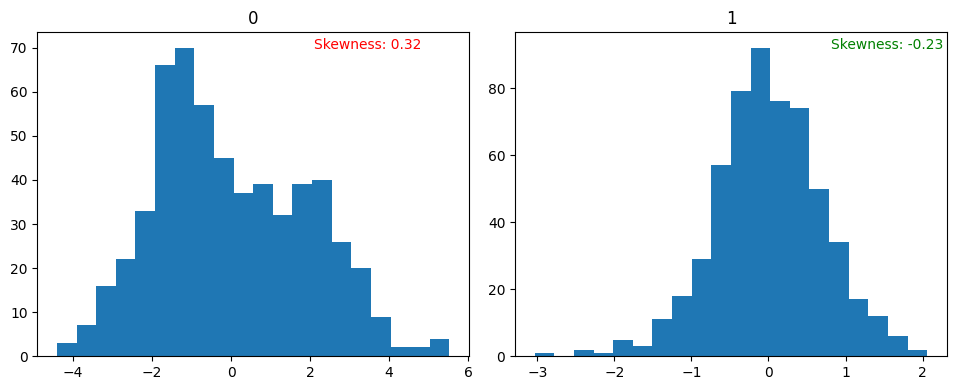

In [ ]:
myt.generate_symmetry_graphs(X_testing_pipe3, graph = 'hist', figsize = (24, 4), x_max_input = 0.35, y_max_input = 0.95, skew_threshold = 0.25)

A threshold of 0.25 has been identified as the point at which variable 0, which is less symmetrical from the graph, can be made to appear more symmetrical.

#**Pipeline finale**

In [ ]:
# Create a custom transformer to return an array in a dataframe
to_dataframe_transformer = FunctionTransformer(myt.to_dataframe, validate=True)

In [ ]:
# Build a final pipeline with all the pipelines created
final_pipeline = Pipeline([
                          ('pipe1', final_pipe1),
                          ('to_dataframe1', to_dataframe_transformer),
                          ('pipe2', final_pipe2),
                          ('to_dataframe2', to_dataframe_transformer),
                          ('pipe3', final_pipe3)
                          ])

In [ ]:
# Applies the final pipeline to the original dataset
X_final = final_pipeline.fit_transform(X,y)

# Make a dataframe
X_final = myt.to_dataframe(X_final)

# Show the new dataset
X_final

,0,1
0,0.903384,0.547479
1,0.717034,0.879823
2,0.726533,0.696414
3,0.749210,0.175443
4,0.671038,0.379647
...,...,...
564,0.868461,0.790891
565,0.774300,0.799454
566,0.633188,0.653038
567,0.956472,0.628272


#**Exporting final pipeline**

In [ ]:
dump(final_pipeline, 'pipeline.joblib')

['pipeline.joblib']